### Welcom to this Stock Market Analysis project.


#### Load Libraries

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

#### Load dataset

In [380]:
stocks = pd.read_csv('stocks.csv')
stocks_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,10day_MA
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,NaN,83322600,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,NaN,64120100,NaN
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,NaN,56007100,NaN
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,NaN,57450700,NaN
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,NaN,62199000,NaN


#### Dataset column names description
   - The dataset contains the following columns for stock market data:
   - Ticker: The stock ticker symbol.
   - Date: The trading date.
   - Open: The opening price of the stock for the day.
   - High: The highest price of the stock during the day.
   - Low: The lowest price of the stock during the day.
   - Close: The closing price of the stock for the day.
   - Adj Close: The adjusted closing price, which accounts for all corporate actions such as dividends, stock splits, etc.
   - Volume: The number of shares traded during the day.


#### This data science project have the following business or research questions to answer at the end of the analysis
   1. what are the summary statistics for each stock
   2. Are there any seasonal patterns or trends for closing prices or adjusted closing price over time?
   3. what was the daily return of ecah stock on average?
   4. What was the moving average of each stock?
   5. Are there any stock with consistently high or low price volume over a period-Volatility?
   6. How stock prices of different companies are related to each other.
      a. corr between different stocks closing prices
      b. corr between different stocks daily returns
   7. Predict future stocks behavior based on the previous stocks

#### Data cleaning and transformation

In [381]:
stocks.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [382]:
# check for null values
stocks.isna().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [383]:
stocks_df.shape

(248, 9)

In [384]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [385]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


#### 1. summary statistics for each stock

In [386]:
summary_stat = stocks.groupby('Ticker')['Close'].describe()

print(summary_stat)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


#### Insights:
- All the four stocks considered for this analysis have equal count of observations.
- AAPL have a mean of 158.24, with a std of 7.36. It has the minimum trading value of 152.31.
   - About 152.08 values will fall below the 25th percentile, 158.06 of the values will be equal to the median value, 
        and 165.16 will fall within the 75th percentile. It has the maxmimum trading volume of 173.57 
- GOOG on the other hand recorded a man of 100.63 with a std of 6.28, and a minimum trading volume of 89.35.
    - GOOG also has the lowest percentile value of 94.70 with a median of 102.76, and 75% of 105.96. Has traded 109.46 
        maximum volume of stocks over time.
    - They also have the least variability compared to other tickers and maybe least affected by extreme values or fluctuations
- MSFT shows a mean of 275.04 with a std of 17.68 making it to be more volatile and distributed away from mean. 
    - The minimum volume traded over time is 246.27 with 258.74 of the values expected to be below or equal to 25%. 
       The 50th percentile equals 275.81 and the 75% value is 287.22 and has traded a maximum volume of 366.83 stocks.
- NFLX recordeda mean value of 327.61 with a std of 18.55. It has a minimum trading volume of 292.76, and the 25% of 
       315.65, median value of 325.60, and the 75% value of 338.89.
    - However, they recorded a maximum trading volume of 366.83 over the period under review.

#### 2. Are there any seasonal patterns or trends for closing prices or adjusted closing price over time?

In [387]:
from datetime import datetime, date

In [388]:
# onvert Date column to python date
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [389]:
# Pivot out date, Ticker, and close 
stock_pivot = stocks.pivot(index='Date', columns='Ticker', values='Close')
stock_pivot.head()

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007


In [ ]:
plt.plot(stock_pivot.index, stock_pivot.values)
plt.title('Time series of closing prices across different stocks')
plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.xticks(rotation=45)
plt.legend(stock_pivot.columns, bbox_to_anchor=(1.05, 0.7), loc='best')
plt.show()

#### Insights:
- GOOG and MSFT shows more upward trend in the closing prices of their stocks compared to AAPL and NFLX that shows a 
    stable moving trend over the period of 4 months.
    - This may also mean they have recorded more revenue and traded more over the period. In other words, they are gainers
    

Text(0.5, 1.0, 'Plot of Volume')

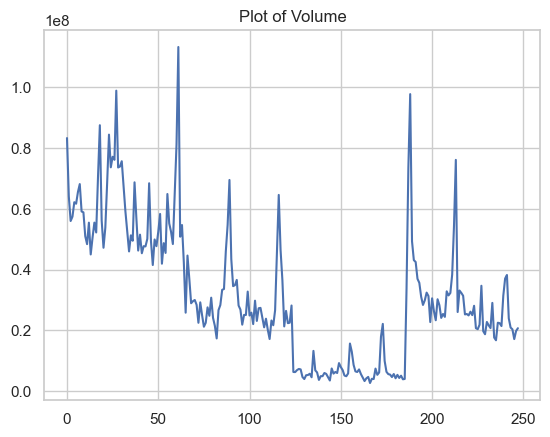

In [150]:
# total volume of stocks traded per day
stocks['Volume'].plot()
plt.title('Plot of Volume')

#### Insights:
- The total volume of stocks traded in a day shows a stable fluctuation with possibility to rise again by the next 
    day following the performance of some tickers like GOOG and MSFT

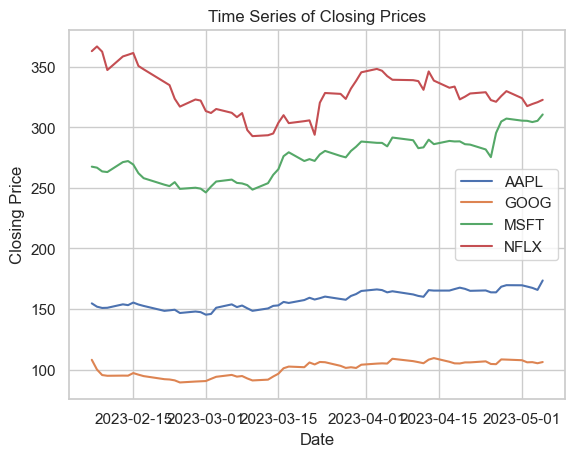

In [372]:
fig, ax = plt.subplots()

for column in stock_pivot.columns:
    ax.plot(stock_pivot.index, stock_pivot[column])
    #sns.scatterplot(stock_pivot.index, y=stock_pivot[column])
    
plt.title('Time Series of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(stock_pivot.columns)

# Show the plot
plt.show()

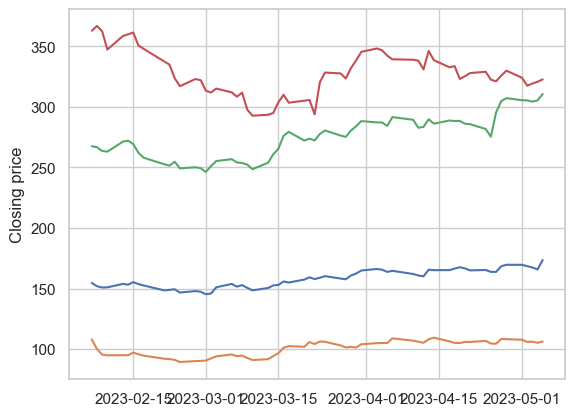

In [153]:
fig, ax = plt.subplots()
# ax.plot(stock_pivot['Date'], stock_pivot['Close'], lw=1)
# ax.set_xlabel('Date')
# ax.set_ylabel('Closing Prices')
# fif.suptitle('Ticker')

for column in stock_pivot.columns:
#     ax.set_xlabel('Date')
     ax.set_ylabel('Closing price')
     ax.plot(stock_pivot.index, stock_pivot[column])
#     #sns.scatterplot(stock_pivot.index, y=stock_pivot[column], legend=True)
plt.show()

In [251]:
stocks.head()
# stocks.drop(columns=['10day_MA', 'column_name'], inplace=True)
# stocks.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-0.017653
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-0.006912
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,0.002456
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,0.018807


In [374]:
#Pivoted data for moving average
ma_pivot = stocks.pivot(index='Date', columns='Ticker', values='Adj Close')
ma_pivot.head()

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.414230,108.040001,266.891510,362.950012
2023-02-08,151.688400,100.000000,266.063599,366.829987
2023-02-09,150.639999,95.459999,262.961365,362.500000
2023-02-10,151.009995,94.860001,262.442657,347.359985
2023-02-13,153.850006,95.000000,270.642120,358.570007


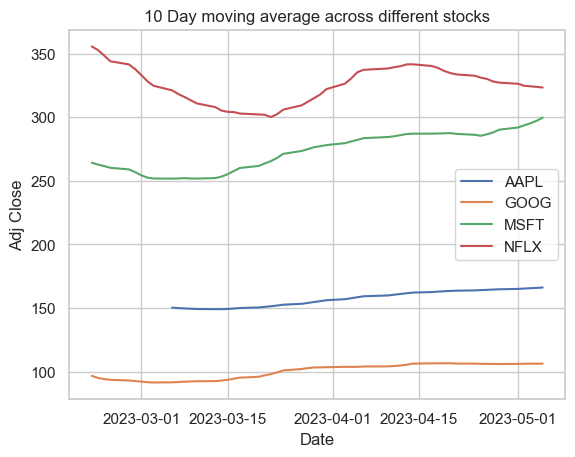

In [286]:
plt.plot(ma_pivot.rolling(10).mean())
#plt.plot(ma_pivot.rolling(20).mean(), color='blue')
plt.title('10 Day moving average across different stocks')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(ma_pivot.columns, loc='best')
#plt.plot(ma_pivot.index, ma_pivot.values)

#### Insight:
- A 10 day moving average was calculated using the adjusted close prices across various stocks.

#### 3. what was the daily return across different stocks on average?

Text(0.5, 1.0, 'Daily Return across different stocks')

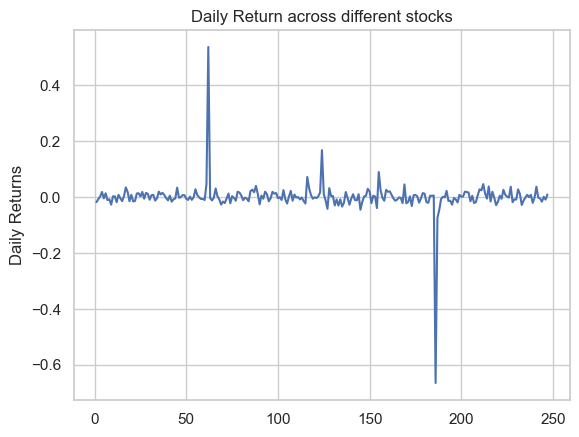

In [287]:
stocks['Daily Returns'] = stocks['Adj Close'].pct_change()

sns.lineplot(data=stocks, x=stocks.index, y=stocks['Daily Returns'])
plt.title('Daily Return across different stocks')

#### Insight:
- Daily returns across different stocks which measures the percentile change of the prices of stocks in a day
- A medium  wave movement or fluctuation in the prices is seen maintaining stable prices

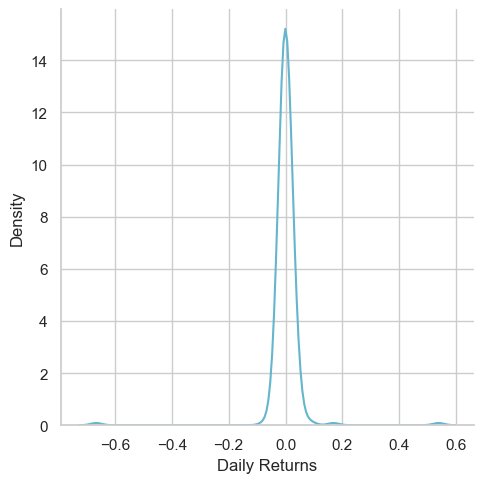

In [238]:
sns.displot(stocks['Daily Returns'], kind='kde', color='c')

#### Are there any stock with consistently high or low price volume over a period-Volatility?

In [288]:
# volatility
stock_pivot.head()

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007


In [299]:
volatility = stock_pivot.std().sort_values(ascending=False)
volatility

Ticker
NFLX    18.554419
MSFT    17.676231
AAPL     7.360485
GOOG     6.279464
dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, '6.2794639728257104'),
  Text(1, 0, '7.360485288670256'),
  Text(2, 0, '17.676231391058884'),
  Text(3, 0, '18.554418705338584')])

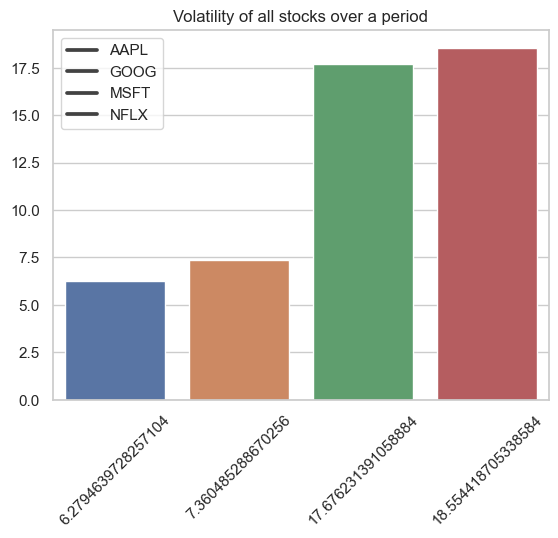

In [320]:
sns.barplot(data=volatility, x= volatility.index, y=volatility.values)
plt.title('Volatility of all stocks over a period')
plt.legend(stock_pivot.columns, loc='best')
plt.xticks(rotation=45)

#### Insight
- The barchart shows the volatility that is observed across all stocks over a period o time with their stds
- NFLX is more volatile followed by MSFT with high std values of 18.55 and 17.68 respectively

#### How stock prices of different companies are related to each other 
    a. corr between different stocks closing prices 
    b. corr between different stocks adj prices

Text(0.5, 1.0, 'Distribution of different stocks closing prices')

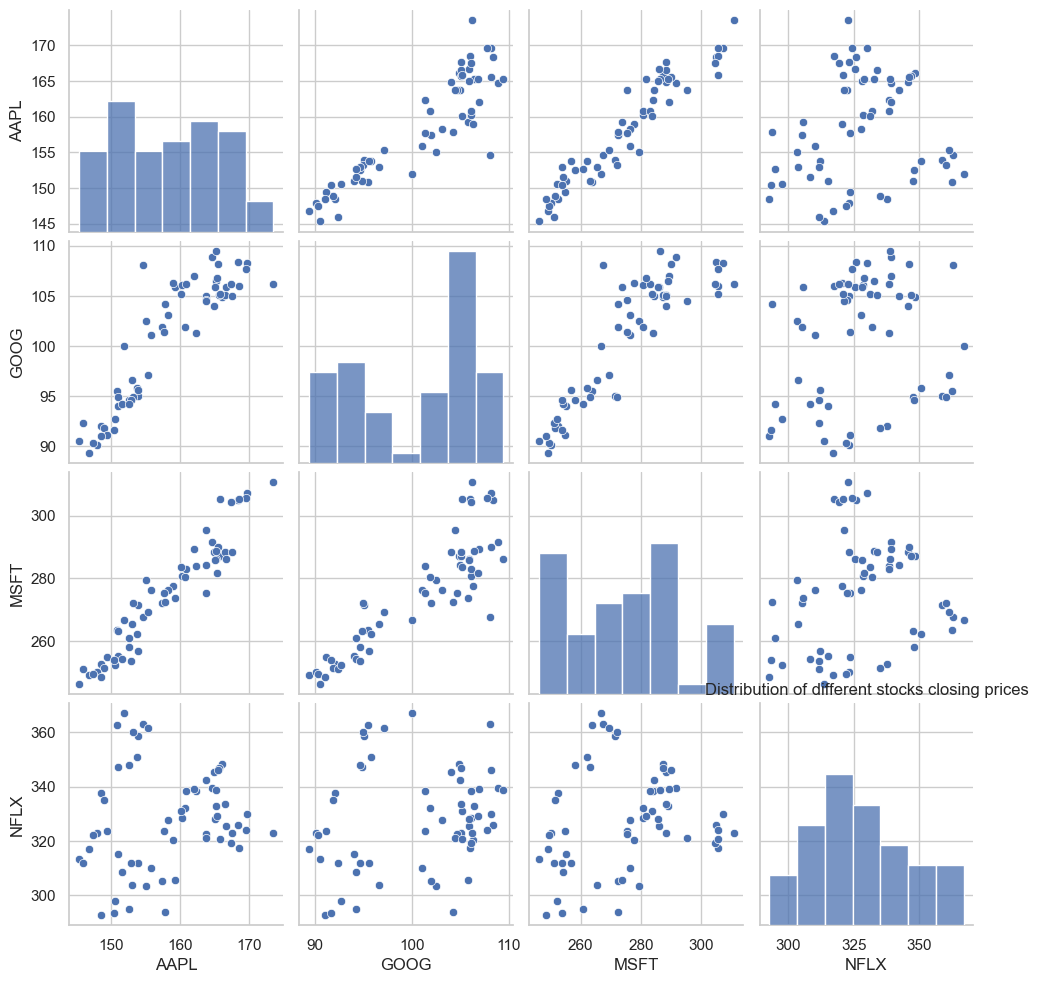

In [351]:
# dist of different stocks closing prices
sns.pairplot(stock_pivot)
plt.title('Distribution of different stocks closing prices')

In [326]:
corr_close_price = stock_pivot.corr()
corr_close_price

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.901662,0.953037,0.154418
GOOG,0.901662,1.000000,0.884527,0.201046
MSFT,0.953037,0.884527,1.000000,0.191273
NFLX,0.154418,0.201046,0.191273,1.000000


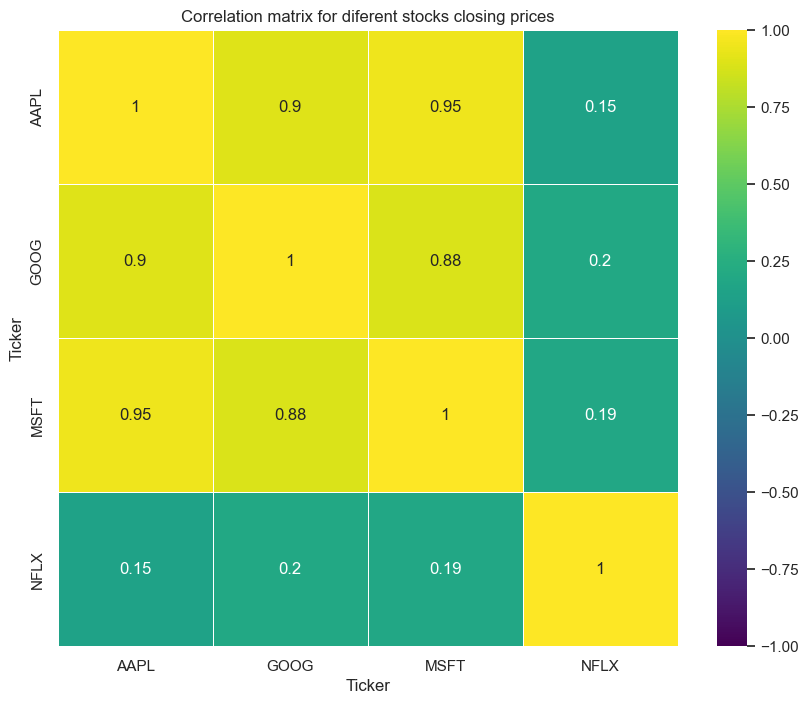

In [340]:
# ploting a corr matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close_price, cmap='viridis', vmin= -1, vmax= 1, annot= True, linewidths=.5, center = 0)
plt.title('Correlation matrix for diferent stocks closing prices')
plt.show()

#### Insight:
- MSFT and GOOG have a strong positive correlation (0.88)
- MSFT and APPL shows a strong positive correlation with a correlation value of 0.95
- GOOG and AAPL also shows a strong positive correlation between them (0.90)
- There exist strong positive correlation among the stocks closing prices per day

Text(0.5, 1.0, 'Distribution of stocks adj closing prices')

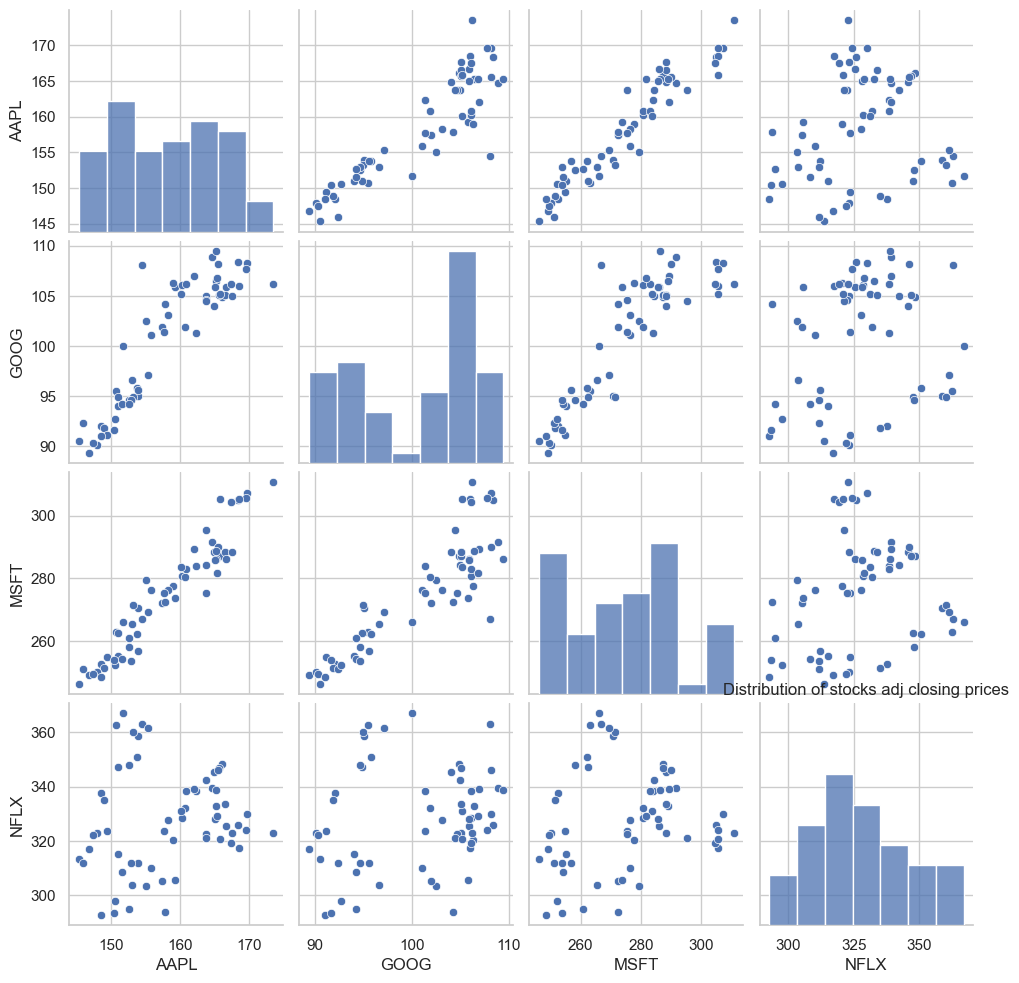

In [375]:
# distribution of various stocks adj closing prices
sns.pairplot(ma_pivot)
plt.title('Distribution of stocks adj closing prices')

In [376]:
# correlation matrix for adj closing prices
corr_adj_prices = ma_pivot.corr()
corr_adj_prices

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.900405,0.953977,0.151178
GOOG,0.900405,1.000000,0.884590,0.201046
MSFT,0.953977,0.884590,1.000000,0.184535
NFLX,0.151178,0.201046,0.184535,1.000000


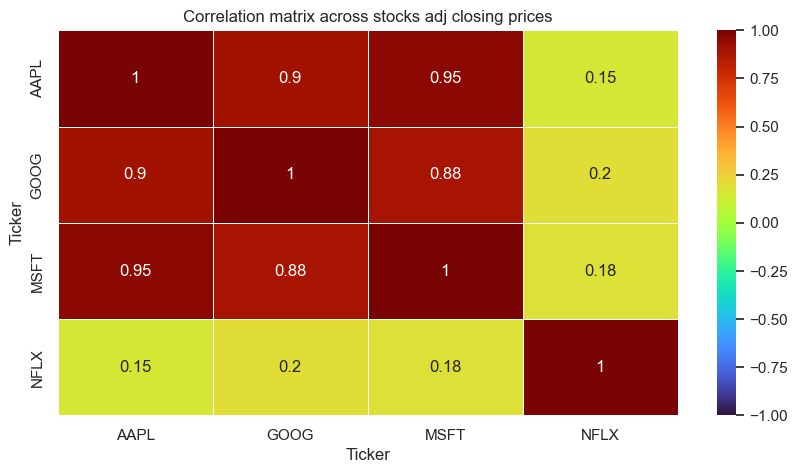

In [378]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_adj_prices, cmap='turbo', vmin=-1, vmax=1, annot=True, linewidths=.5, center=0)
plt.title('Correlation matrix across stocks adj closing prices')
plt.show()

#### Insight:
- NFLX and AAPL have a positive correlation value of 0.58
- MSFT and APPL shows a strong positive correlation with a correlation value of 0.92
- MSFT and GOOG shows a strong positive correlation value of 0.88
- GOOG and AAPL also shows a strong positive correlation between them with a correlation value of 0.85
- There exist strong positive correlation across the various stocks adj closing prices per day

#### Thank you. Watch out for the next tutorial!